# 基于水色图像的水质评价

## 挖掘目标

- 根据给定的样本，利用图像处理技术，通过水色图像实现水质的自动评价

## 分析方法与过程

- 图像数据维度过大，不容易分析，需要从中提取出反应水质特征的关键指标，**图像特征提取是图像识别的关键步骤**。

**步骤**
- 从采集到的原始水样数据中抽取建模数据和增量数据
- 数据预处理，包括图像切割和颜色矩特征提取
- 由有经验的专家根据经验进行分类
- 构建分类模型
- 利用构建好的模型进行水质评价

### 数据预处理

**图像切割**
采集到的图像带有盛水容器，水体位于图像中央，提取图像中央101 by 101个像素点的数据作为数据集

**特征提取**
- 一阶颜色矩：反映图像的整体明暗程度
- 二阶颜色矩：反映图像颜色的分布范围
- 三阶颜色矩：反映图像颜色分布的对称性

In [1]:
import numpy as np
import pandas as pd

In [4]:
data= pd.read_csv('./data/data_9/moment.csv')
data.head()

,类别,序号,R通道一阶矩,G通道一阶矩,B通道一阶矩,R通道二阶矩,G通道二阶矩,B通道二阶矩,R通道三阶矩,G通道三阶矩,B通道三阶矩
0,1,1,0.582823,0.543774,0.252829,0.014192,0.016144,0.041075,-0.012643,-0.016090,-0.041536
1,1,10,0.641660,0.570657,0.213728,0.015439,0.011178,0.013708,0.009727,-0.003724,-0.003779
2,1,11,0.603684,0.576719,0.282254,0.008659,0.007075,0.012204,-0.004695,-0.002571,-0.009451
3,1,12,0.589706,0.593743,0.252242,0.007908,0.005941,0.010568,0.003303,-0.003417,-0.005273
4,1,13,0.591096,0.592093,0.253595,0.007448,0.006495,0.012152,0.000496,-0.002236,-0.005096


### 模型构建

In [7]:
from sklearn.model_selection import train_test_split

inputfile = './data/data_9/moment.csv'
data = pd.read_csv(inputfile)

X = data.drop('类别', axis=1)
y = data['类别'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

所有的特征取值范围都在-1到1之间，彼此之间的区分度较小。因此我们不妨将它们统一乘以一个常数k，从而提高区分度和准确率，k的选择不能过大，也不能过小。
- 过小会导致区分度底，模型精度差
- 过大会导致过拟合

In [8]:
X_train, X_test = X_train * 30, X_test * 30

from sklearn.svm import SVC
import pickle

model = SVC().fit(X_train, y_train)
pickle.dump(model, open('./data/data_9/svm.model', 'wb'))

from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_train, model.predict(X_train))
cm_test = confusion_matrix(y_test, model.predict(X_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

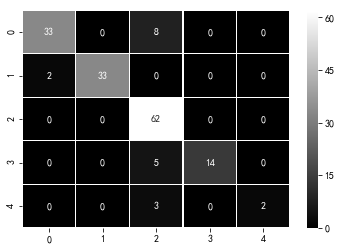

In [16]:
sns.heatmap(cm_train, cmap='gray', linewidth=0.2, annot=True)

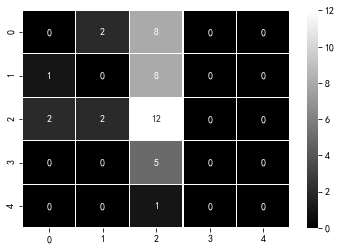

In [17]:
sns.heatmap(cm_test, cmap='gray', linewidth=0.2, annot=True)